In [3]:
import sys
sys.path.append('..')
from eyelib import dataload, dataprocess, byorigin
import importlib
import numpy as np
import os
import scipy
import matplotlib.pyplot as plt
import pingouin as pg

d:\ProgramData\Anaconda3\envs\torch\lib\site-packages\outdated\utils.py:14: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
importlib.reload(dataload)

<module 'eyelib.dataload' from 'd:\\dst\\Repos\\ASD-EyeTrack-RGB\\stats\\..\\eyelib\\dataload.py'>

In [2]:
newdev_name = 'gts4lvwifichn'
olddev_name = 'HWBAH4'

In [4]:
### Statistics for time consuming under video mode

ASD_path = '../data/ASD/'
TD_path = '../data/TD/'

ASD_paid = [[],[]]
TD_paid = [[],[]]
NaN_paid = [[],[]]

for record_file in os.listdir(ASD_path):
    eye_coor, sti_type, exp_info, usr_info = dataload.read_record(ASD_path+record_file)
    if exp_info['testMode'] == 'video' and exp_info['deviceName']== olddev_name and len(eye_coor) == 8:
        regular_coor = dataprocess.regular_record(eye_coor, 30)
        ASD_times, TD_times, NaN_times = byorigin.time_per_side(regular_coor, sti_type)
        ASD_paid[0].append(np.mean(ASD_times))
        TD_paid[0].append(np.mean(TD_times))
        NaN_paid[0].append(np.mean(NaN_times))
    elif exp_info['testMode'] == 'video' and len(eye_coor) == 8:
        regular_coor = dataprocess.regular_record(eye_coor, 60)
        ASD_times, TD_times, NaN_times = byorigin.time_per_side(regular_coor, sti_type)
        ASD_paid[0].append(np.mean(ASD_times))
        TD_paid[0].append(np.mean(TD_times))
        NaN_paid[0].append(np.mean(NaN_times))

for record_file in os.listdir(TD_path):
    eye_coor, sti_type, exp_info, usr_info = dataload.read_record(TD_path+record_file)
    if exp_info['testMode'] == 'video' and exp_info['deviceName']== olddev_name and len(eye_coor) == 8:
        regular_coor = dataprocess.regular_record(eye_coor, 30)
        ASD_times, TD_times, NaN_times = byorigin.time_per_side(regular_coor, sti_type)
        ASD_paid[1].append(np.mean(ASD_times))
        TD_paid[1].append(np.mean(TD_times))
        NaN_paid[1].append(np.mean(NaN_times))
    elif exp_info['testMode'] == 'video' and len(eye_coor) == 8:
        regular_coor = dataprocess.regular_record(eye_coor, 60)
        ASD_times, TD_times, NaN_times = byorigin.time_per_side(regular_coor, sti_type)
        ASD_paid[1].append(np.mean(ASD_times))
        TD_paid[1].append(np.mean(TD_times))
        NaN_paid[1].append(np.mean(NaN_times))

for i in range(2):        
    ASD_paid[i] = np.array(ASD_paid[i])
    TD_paid[i] = np.array(TD_paid[i])
    NaN_paid[i] = np.array(NaN_paid[i])

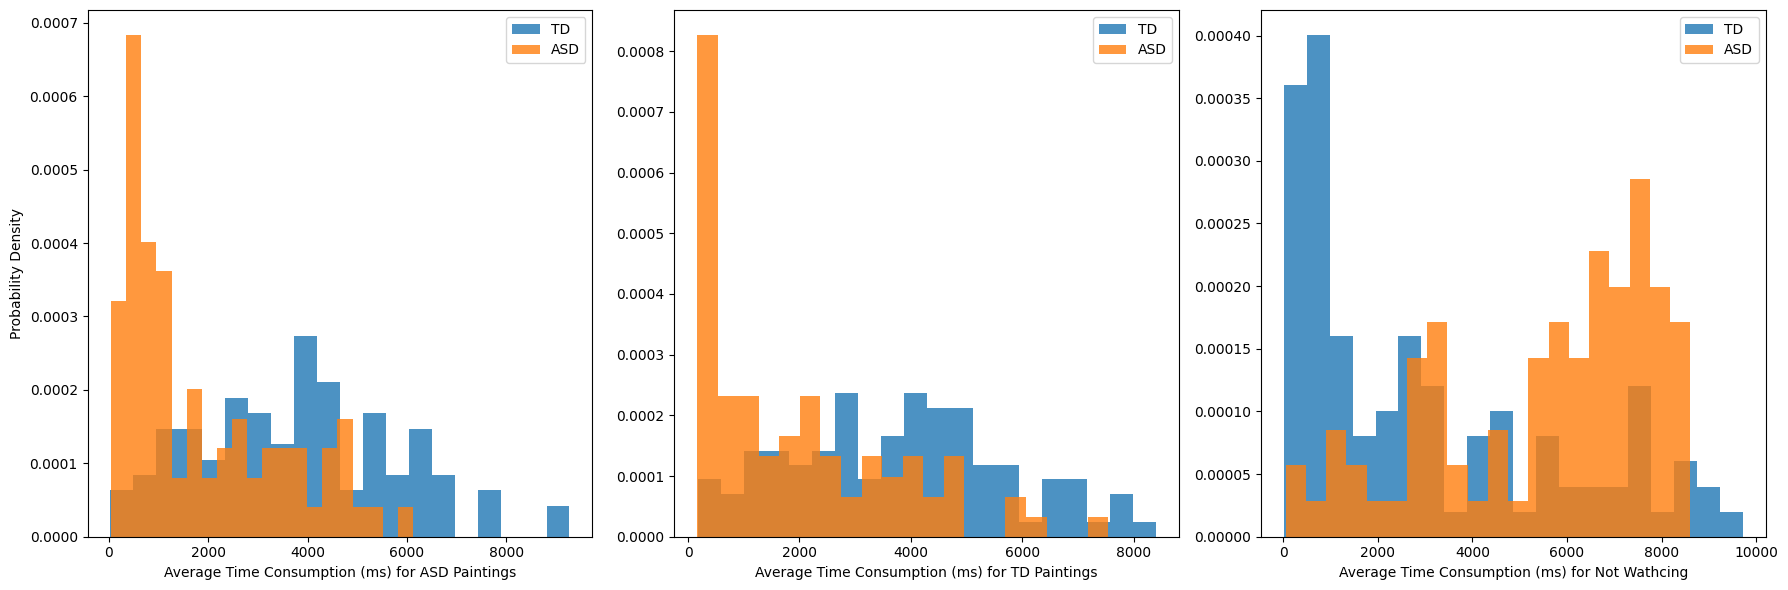

In [6]:
fig = plt.figure(figsize=(18,6))

plt.subplot(131)
plt.hist(ASD_paid[1], bins=20, density=True, alpha = 0.8, label='TD')
plt.hist(ASD_paid[0], bins=20, density=True, alpha = 0.8, label='ASD')
plt.xlabel('Average Time Consumption (ms) for ASD Paintings')
plt.ylabel('Probability Density')

#plt.axvline(np.median(entropy_grey[1]), linestyle='--', c='#1f77b4', label='Median of TD')
#plt.text(np.median(entropy_grey[1])-0.15, 1.8, np.round(np.median(entropy_grey[1]),2), c='#1f77b4',fontsize=12)
#plt.axvline(np.median(entropy_grey[0]), linestyle='--', c='#ff7f0e', label='Median of ASD')
#plt.text(np.median(entropy_grey[0])+0.05, 2.25, np.round(np.median(entropy_grey[0]),2), c='#ff7f0e',fontsize=12)

plt.legend()

plt.subplot(132)
plt.hist(TD_paid[1], bins=20, density=True, alpha = 0.8, label='TD')
plt.hist(TD_paid[0], bins=20, density=True, alpha = 0.8, label='ASD')
plt.xlabel('Average Time Consumption (ms) for TD Paintings')

#plt.axvline(np.median(entropy_grey[1]), linestyle='--', c='#1f77b4', label='Median of TD')
#plt.text(np.median(entropy_grey[1])-0.15, 1.8, np.round(np.median(entropy_grey[1]),2), c='#1f77b4',fontsize=12)
#plt.axvline(np.median(entropy_grey[0]), linestyle='--', c='#ff7f0e', label='Median of ASD')
#plt.text(np.median(entropy_grey[0])+0.05, 2.25, np.round(np.median(entropy_grey[0]),2), c='#ff7f0e',fontsize=12)

plt.legend()

plt.subplot(133)
plt.hist(NaN_paid[1], bins=20, density=True, alpha = 0.8, label='TD')
plt.hist(NaN_paid[0], bins=20, density=True, alpha = 0.8, label='ASD')
plt.xlabel('Average Time Consumption (ms) for Not Wathcing')

#plt.axvline(np.median(entropy_grey[1]), linestyle='--', c='#1f77b4', label='Median of TD')
#plt.text(np.median(entropy_grey[1])-0.15, 1.8, np.round(np.median(entropy_grey[1]),2), c='#1f77b4',fontsize=12)
#plt.axvline(np.median(entropy_grey[0]), linestyle='--', c='#ff7f0e', label='Median of ASD')
#plt.text(np.median(entropy_grey[0])+0.05, 2.25, np.round(np.median(entropy_grey[0]),2), c='#ff7f0e',fontsize=12)

plt.legend()

plt.tight_layout()
plt.show()

In [6]:
print(scipy.stats.ranksums(ASD_paid[0], ASD_paid[1]))
print(scipy.stats.ranksums(TD_paid[0], TD_paid[1]))
print(scipy.stats.ranksums(NaN_paid[0], NaN_paid[1]))
display(pg.mwu(NaN_paid[1], NaN_paid[0]))

RanksumsResult(statistic=-6.478377032114767, pvalue=9.271444550390308e-11)
RanksumsResult(statistic=-6.2158148230486825, pvalue=5.105899007758853e-10)
RanksumsResult(statistic=6.091443250333168, pvalue=1.1189725296068715e-09)


,U-val,alternative,p-val,RBC,CLES
MWU,2019.0,two-sided,1.128674e-09,0.521904,0.239048


In [12]:
ASD_paid_rate = []
TD_paid_rate = []
for i in range(2):
    ASD_paid_rate.append(ASD_paid[i]/(ASD_paid[i]+TD_paid[i]))
    TD_paid_rate.append(TD_paid[i]/(ASD_paid[i]+TD_paid[i]))

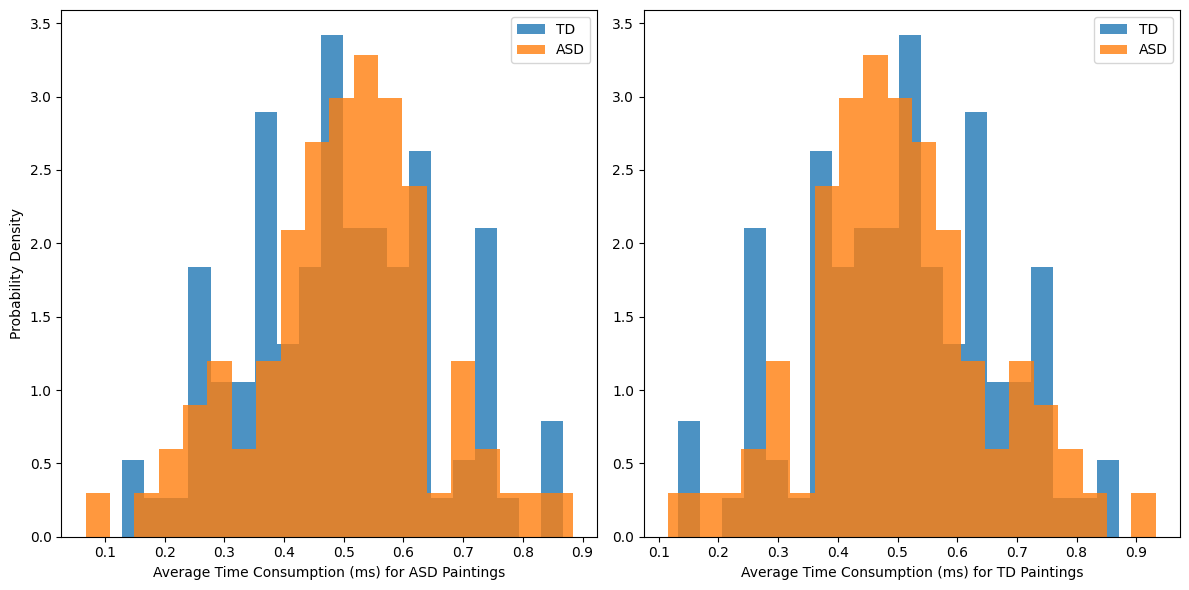

In [14]:
fig = plt.figure(figsize=(12,6))

plt.subplot(121)
plt.hist(ASD_paid_rate[1], bins=20, density=True, alpha = 0.8, label='TD')
plt.hist(ASD_paid_rate[0], bins=20, density=True, alpha = 0.8, label='ASD')
plt.xlabel('Average Time Consumption (ms) for ASD Paintings')
plt.ylabel('Probability Density')

#plt.axvline(np.median(entropy_grey[1]), linestyle='--', c='#1f77b4', label='Median of TD')
#plt.text(np.median(entropy_grey[1])-0.15, 1.8, np.round(np.median(entropy_grey[1]),2), c='#1f77b4',fontsize=12)
#plt.axvline(np.median(entropy_grey[0]), linestyle='--', c='#ff7f0e', label='Median of ASD')
#plt.text(np.median(entropy_grey[0])+0.05, 2.25, np.round(np.median(entropy_grey[0]),2), c='#ff7f0e',fontsize=12)

plt.legend()

plt.subplot(122)
plt.hist(TD_paid_rate[1], bins=20, density=True, alpha = 0.8, label='TD')
plt.hist(TD_paid_rate[0], bins=20, density=True, alpha = 0.8, label='ASD')
plt.xlabel('Average Time Consumption (ms) for TD Paintings')

#plt.axvline(np.median(entropy_grey[1]), linestyle='--', c='#1f77b4', label='Median of TD')
#plt.text(np.median(entropy_grey[1])-0.15, 1.8, np.round(np.median(entropy_grey[1]),2), c='#1f77b4',fontsize=12)
#plt.axvline(np.median(entropy_grey[0]), linestyle='--', c='#ff7f0e', label='Median of ASD')
#plt.text(np.median(entropy_grey[0])+0.05, 2.25, np.round(np.median(entropy_grey[0]),2), c='#ff7f0e',fontsize=12)

plt.legend()

plt.tight_layout()
plt.show()

In [13]:
print(scipy.stats.ranksums(ASD_paid_rate[0], ASD_paid_rate[1]))
print(scipy.stats.ranksums(TD_paid_rate[0], TD_paid_rate[1]))

RanksumsResult(statistic=0.40075284541665585, pvalue=0.6886020993396056)
RanksumsResult(statistic=-0.40075284541665585, pvalue=0.6886020993396056)


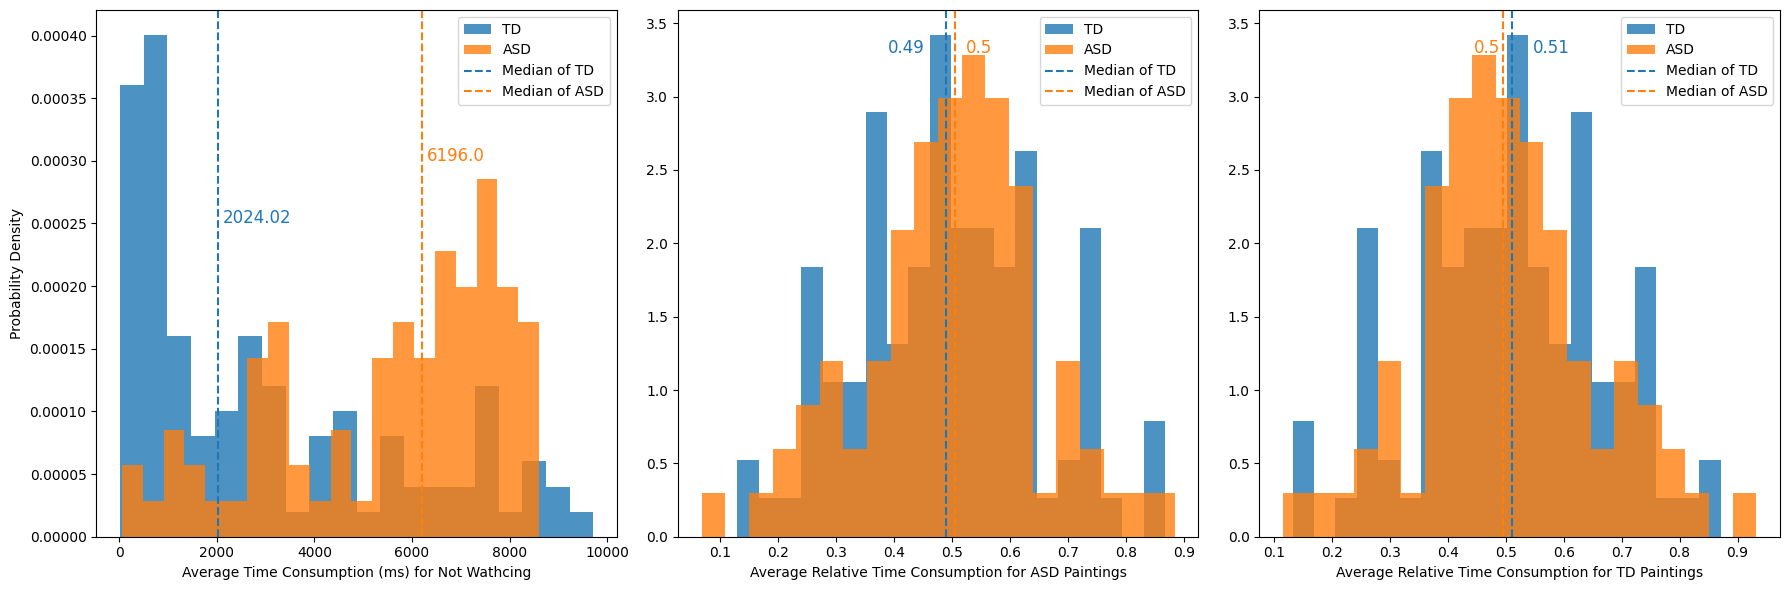

In [37]:
fig = plt.figure(figsize=(18,6))

plt.subplot(131)
plt.hist(NaN_paid[1], bins=20, density=True, alpha = 0.8, label='TD')
plt.hist(NaN_paid[0], bins=20, density=True, alpha = 0.8, label='ASD')
plt.xlabel('Average Time Consumption (ms) for Not Wathcing')
plt.ylabel('Probability Density')

plt.axvline(np.median(NaN_paid[1]), linestyle='--', c='#1f77b4', label='Median of TD')
plt.text(np.median(NaN_paid[1])+100, 0.00025, np.round(np.median(NaN_paid[1]),2), c='#1f77b4',fontsize=12)
plt.axvline(np.median(NaN_paid[0]), linestyle='--', c='#ff7f0e', label='Median of ASD')
plt.text(np.median(NaN_paid[0])+100, 0.00030, np.round(np.median(NaN_paid[0]),2), c='#ff7f0e',fontsize=12)

plt.legend()

plt.subplot(132)
plt.hist(ASD_paid_rate[1], bins=20, density=True, alpha = 0.8, label='TD')
plt.hist(ASD_paid_rate[0], bins=20, density=True, alpha = 0.8, label='ASD')
plt.xlabel('Average Relative Time Consumption for ASD Paintings')

plt.axvline(np.median(ASD_paid_rate[1]), linestyle='--', c='#1f77b4', label='Median of TD')
plt.text(np.median(ASD_paid_rate[1])-0.1, 3.3, np.round(np.median(ASD_paid_rate[1]),2), c='#1f77b4',fontsize=12)
plt.axvline(np.median(ASD_paid_rate[0]), linestyle='--', c='#ff7f0e', label='Median of ASD')
plt.text(np.median(ASD_paid_rate[0])+0.02, 3.3, np.round(np.median(ASD_paid_rate[0]),2), c='#ff7f0e',fontsize=12)

plt.legend()

plt.subplot(133)
plt.hist(TD_paid_rate[1], bins=20, density=True, alpha = 0.8, label='TD')
plt.hist(TD_paid_rate[0], bins=20, density=True, alpha = 0.8, label='ASD')
plt.xlabel('Average Relative Time Consumption for TD Paintings')

plt.axvline(np.median(TD_paid_rate[1]), linestyle='--', c='#1f77b4', label='Median of TD')
plt.text(np.median(TD_paid_rate[1])+0.035, 3.3, np.round(np.median(TD_paid_rate[1]),2), c='#1f77b4',fontsize=12)
plt.axvline(np.median(TD_paid_rate[0]), linestyle='--', c='#ff7f0e', label='Median of ASD')
plt.text(np.median(TD_paid_rate[0])-0.05, 3.3, np.round(np.median(TD_paid_rate[0]),2), c='#ff7f0e',fontsize=12)

plt.legend()

plt.tight_layout()
plt.show()

#fig.savefig('origin-1.svg')